In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df = df.drop('id', axis=1)

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
categorical_features = ["gender","hypertension", "heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
unique_values = {col: df[col].unique() for col in categorical_features}
unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'hypertension': array([0, 1]),
 'heart_disease': array([1, 0]),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'Residence_type': array(['Urban', 'Rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object),
 'stroke': array([1, 0])}

In [11]:
for col, values in unique_values.items():
    print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [15]:
duplicated_sum = df.duplicated().sum()
duplicated_sum

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [19]:
y = df['stroke']
y.value_counts(normalize=True)*100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [22]:
import plotly.express as px
px.bar(x=y.value_counts().index, y=y.value_counts(), color=y.value_counts().index)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([0, 1]), 'coloraxis': 'coloraxis', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1]),
              'xaxis': 'x',
              'y': array([4861,  249]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

since Dataset is not balanced so we can not use accuracy as a metric for a model to check how well it predicts dataset.

instead we can use ROC curve and Recall

In [23]:
cols = df.columns
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


1> Since mean age is less than median age i.e age is left skewed

2> Since mean avg_glucose_level is greater than median glucose level i.e glucose level is right skewed

3> Since mean bmi is greater than median bmi i.e bmi is right skewed

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

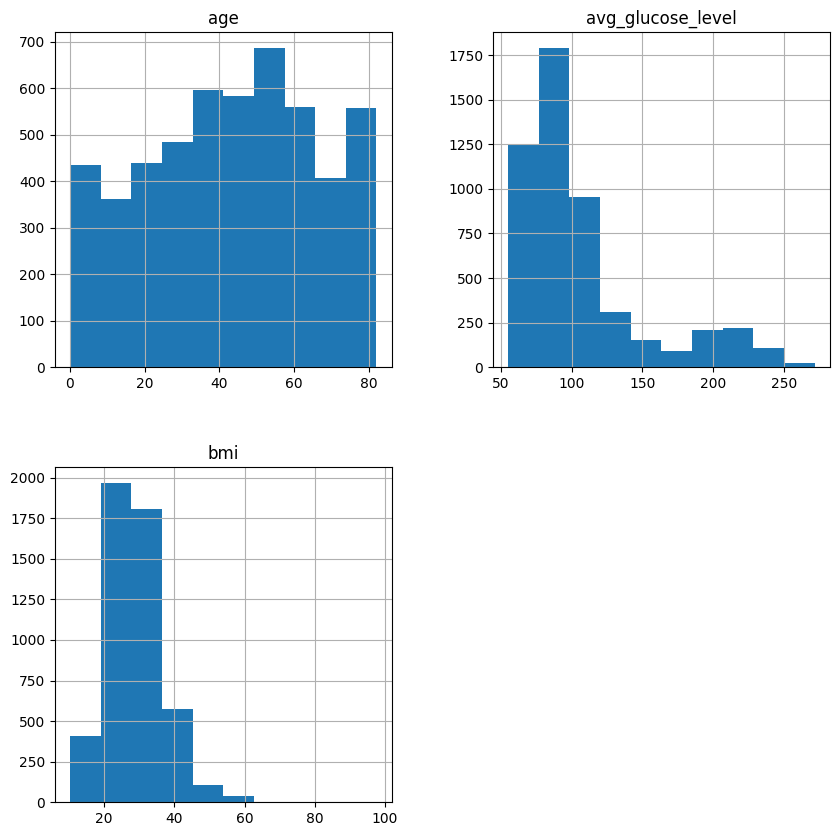

In [27]:
df[numerical_features].hist(figsize=(10,10))

In [32]:
import matplotlib.pyplot as plt

In [44]:
def create_value_counts_hist(x):
    plt.figure(figsize=(6,4))
    df[x].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{x} Distribution")
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

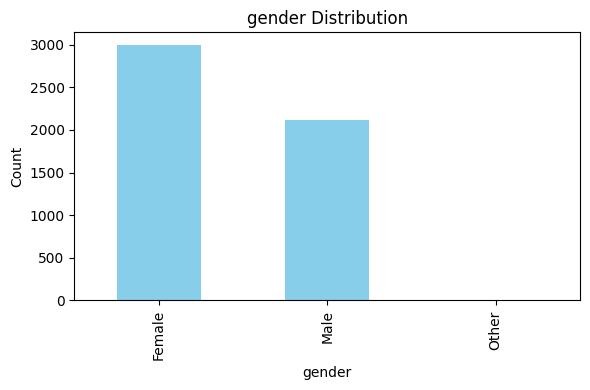

In [45]:
create_value_counts_hist('gender')

In [43]:
print(f"Male stroke percentage: {round(df[df['gender']=='Male']['stroke'].mean()*100, 2)}%")
print(f"Female stroke percentage: {round(df[df['gender']=='Female']['stroke'].mean()*100, 2)}%")

Male stroke percentage: 5.11%
Female stroke percentage: 4.71%


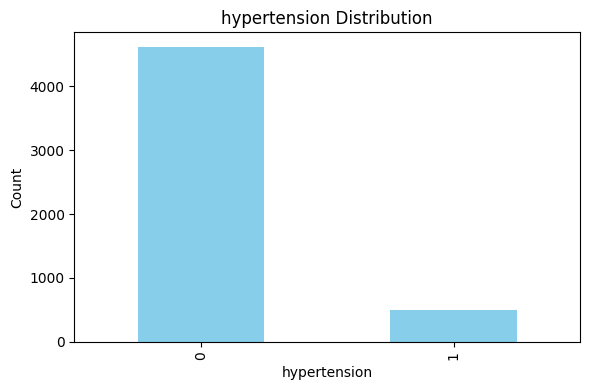

In [46]:
create_value_counts_hist("hypertension")

In [48]:
print(f"having hypertension stroke percentage: {round(df[df['hypertension'] == 1]['stroke'].mean()*100, 2)}%")
print(f"NOT having hypertension stroke percentage: {round(df[df['hypertension'] == 0]['stroke'].mean()*100, 2)}%")

having hypertension stroke percentage: 13.25%
NOT having hypertension stroke percentage: 3.97%


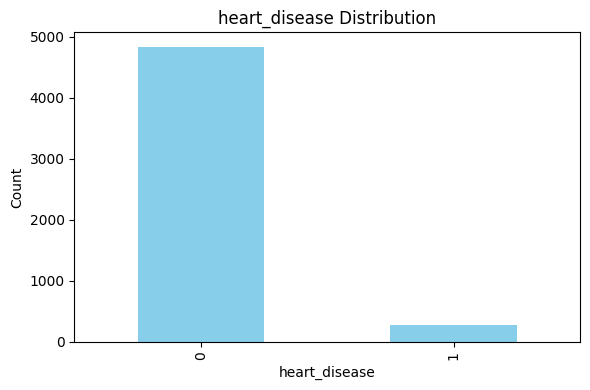

In [49]:
create_value_counts_hist("heart_disease")

In [50]:
print(f"having heart disease stroke percentage: {round(df[df['heart_disease'] == 1]['stroke'].mean()*100, 2)}%")
print(f"NOT having heart disease stroke percentage: {round(df[df['heart_disease'] == 0]['stroke'].mean()*100, 2)}%")

having heart disease stroke percentage: 17.03%
NOT having heart disease stroke percentage: 4.18%


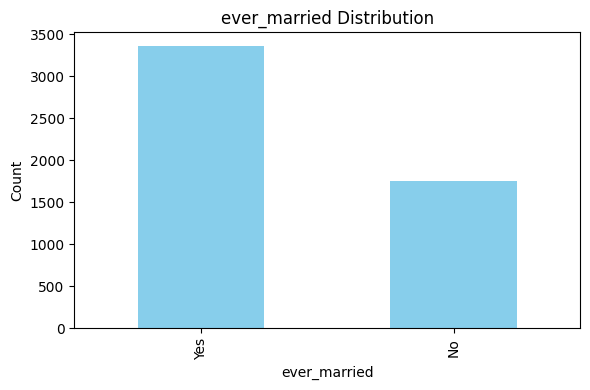

In [51]:
create_value_counts_hist("ever_married")

In [53]:
print(f"is married stroke percentage: {round(df[df['ever_married'] == 'Yes']['stroke'].mean()*100, 2)}%")
print(f"NOT married stroke percentage: {round(df[df['ever_married'] == 'No']['stroke'].mean()*100, 2)}%")

is married stroke percentage: 6.56%
NOT married stroke percentage: 1.65%


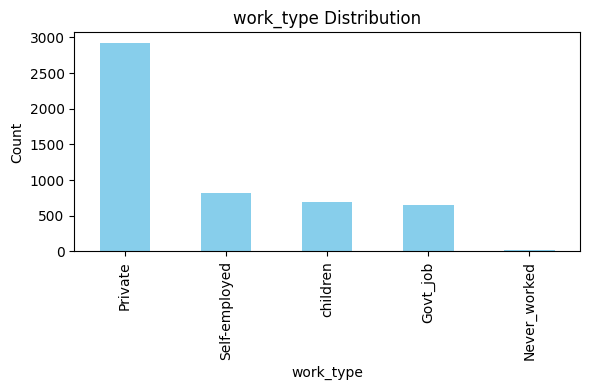

In [54]:
create_value_counts_hist("work_type")

In [60]:
# Stroke Percentage based on work type
stroke_percentage_work_type = df.groupby('work_type')['stroke'].mean()*100
stroke_percentage_work_type.sort_values(ascending=False)

work_type
Self-employed    7.936508
Private          5.094017
Govt_job         5.022831
children         0.291121
Never_worked     0.000000
Name: stroke, dtype: float64

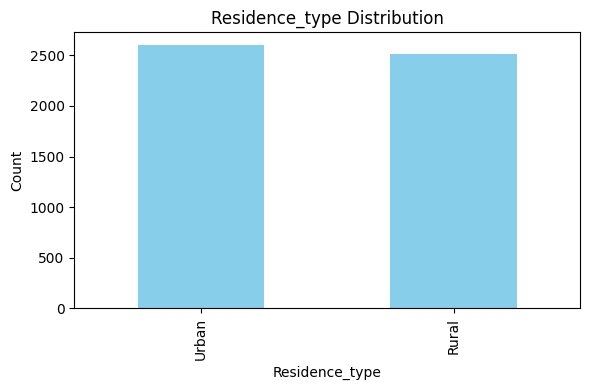

In [61]:
create_value_counts_hist("Residence_type")

In [62]:
stroke_percentage_Residence_type = df.groupby(["Residence_type"])["stroke"].mean()*100
stroke_percentage_Residence_type.sort_values(ascending=False)

Residence_type
Urban    5.200308
Rural    4.534606
Name: stroke, dtype: float64

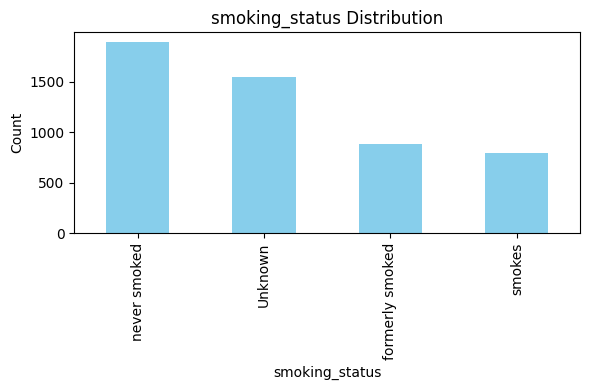

In [63]:
create_value_counts_hist("smoking_status")

In [64]:
stroke_percentage_smoking_status = df.groupby(["smoking_status"])["stroke"].mean()*100
stroke_percentage_smoking_status.sort_values(ascending=False)

smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64

In [66]:
from sklearn.metrics import mutual_info_score
categorical_features = ["gender","hypertension", "heart_disease","ever_married","work_type","Residence_type","smoking_status"]
for col in categorical_features:
    mi = mutual_info_score(df[col], df['stroke'])
    print(f"{col}: {mi:.2f}")

gender: 0.00
hypertension: 0.01
heart_disease: 0.01
ever_married: 0.01
work_type: 0.01
Residence_type: 0.00
smoking_status: 0.00


In [67]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features + ['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


#### Inference gathered from EDA:

1> Weak positive relationship (0.25) between age and stroke

2> Slight difference in avg. glucose level between stroke/no_stroke

3> BMI shows no significant relation to stroke

4> Hypertension increases stroke risk by 3.3x

5> Males slightly more likely to have stroke than feamales

6> Heart disease increases stroke risk by 4.07x.

7> Married individuals 5.7x more likely to have stroke.

8> Self-employed individuals have higher stroke probability.

9> Rural residents slightly more likely more likely to have stroke than urban.

10> Little difference in stroke risk between smokers and non-smokers.

In [75]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

numerical = ['age', 'avg_glucose_level', 'bmi']
categorical = ["gender","hypertension", "heart_disease","ever_married","work_type","Residence_type","smoking_status"]

transformer = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy="median")), ("power", PowerTransformer(method="yeo-johnson", standardize=True))]), numerical),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append("RF")
    return models, names

def evaluate_models(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores

In [77]:
import numpy as np
from imblearn.pipeline import Pipeline as IMBPipeline

y = df['stroke']
X = df.drop('stroke', axis=1)
models, names = get_models()

results = list()

for i in range(len(models)):
    imb_pipeline = IMBPipeline(steps=[('transformer', transformer), ('smote', SMOTE()), ('model', models[i])])
    scores = evaluate_models(X, y, imb_pipeline)
    results.append(scores)
    
    print("> %s: ROC-AUC = %.3f (%.3f)" %(names[i], np.mean(scores), np.std(scores)))

> LR: ROC-AUC = 0.834 (0.029)
> LDA: ROC-AUC = 0.836 (0.029)
> RF: ROC-AUC = 0.782 (0.026)
